# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Import essential ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report
)

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
# Your code here :

# Shuffle the dataset to ensure randomness (optional but recommended)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the split index
split_index = int(0.8 * len(data))

# Split the data into training and testing sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Training set
X_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV']

# Testing set
X_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']

# Check the shape of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (404, 13)
Testing features shape: (102, 13)
Training target shape: (404,)
Testing target shape: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
# Your code here :

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
# Your code here :

# Calculate R-squared for the training set
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training R-squared: {train_r2}")

# Calculate R-squared for the testing set
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testing R-squared: {test_r2}")

Training R-squared: 0.7499835922256721
Testing R-squared: 0.6872797475661035


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
# Your code here :

# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

# Calculate MSE for the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Testing MSE: {test_mse}")

Training MSE: 21.939692867474168
Testing MSE: 22.26631108083701


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
# Your code here :

# Calculate Mean Absolute Error (MAE) for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")

Training MAE: 3.3437359079329543
Testing MAE: 3.146556447921057


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
column_names = iris.feature_names

In [13]:
df = pd.DataFrame(iris['data'],columns=column_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = pd.DataFrame(iris.target)

In [16]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
# Your code here :

# Convert the dataset into pandas DataFrames
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['class'])

# Concatenate df and target
data_iris = pd.concat([df, target], axis=1)

# Perform stratified split manually (80% training, 20% testing)
train_df = data_iris.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))
test_df = data_iris.drop(train_df.index)

# Extract X_train, X_test, y_train, y_test
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Verify the split
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts())

print("Testing set class distribution:")
print(y_test.value_counts())

Training features shape: (120, 4)
Testing features shape: (30, 4)
Training target shape: (120,)
Testing target shape: (30,)
Training set class distribution:
0    40
1    40
2    40
Name: class, dtype: int64
Testing set class distribution:
0    10
1    10
2    10
Name: class, dtype: int64


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
# Your code here :

# Initialize the LogisticRegression model
model = LogisticRegression(max_iter=200)  # Increase max_iter for convergence

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
# Your code here :

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Testing Accuracy: 0.97


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
# Your code here :

# Calculate balanced accuracy for training and testing sets
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print balanced accuracy
print(f"Training Balanced Accuracy: {train_balanced_accuracy:.2f}")
print(f"Testing Balanced Accuracy: {test_balanced_accuracy:.2f}")

Training Balanced Accuracy: 0.98
Testing Balanced Accuracy: 0.97


## 10. Calculate and print the precision score for both the training and the testing set.

In [22]:
# Your code here :

# Calculate precision scores for training and testing sets
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

# Print precision scores
print(f"Training Precision Score: {train_precision:.2f}")
print(f"Testing Precision Score: {test_precision:.2f}")

Training Precision Score: 0.98
Testing Precision Score: 0.97


## 11. Calculate and print the recall score for both the training and the testing set.

In [23]:
# Your code here :

# Calculate recall scores for training and testing sets
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Print recall scores
print(f"Training Recall Score: {train_recall:.2f}")
print(f"Testing Recall Score: {test_recall:.2f}")

Training Recall Score: 0.98
Testing Recall Score: 0.97


## 12. Calculate and print the F1 score for both the training and the testing set.

In [24]:
# Your code here :

# Calculate F1 score for training and test sets
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print F1 scores
print(f"Training F1 Score: {train_recall:.2f}")
print(f"Testing F1 Score: {test_recall:.2f}")

Training F1 Score: 0.98
Testing F1 Score: 0.97


## 13. Generate confusion matrices for both the training and the testing set.

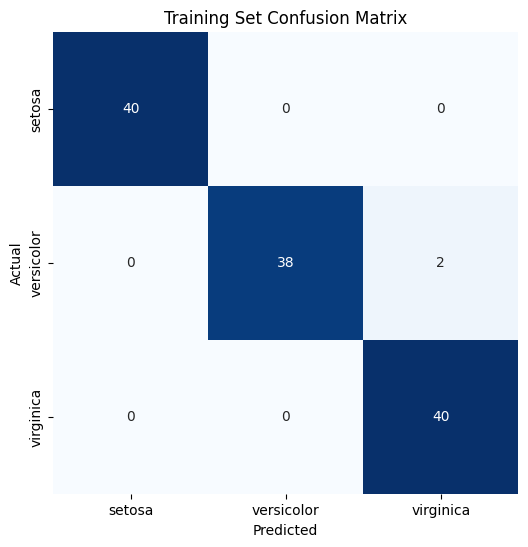

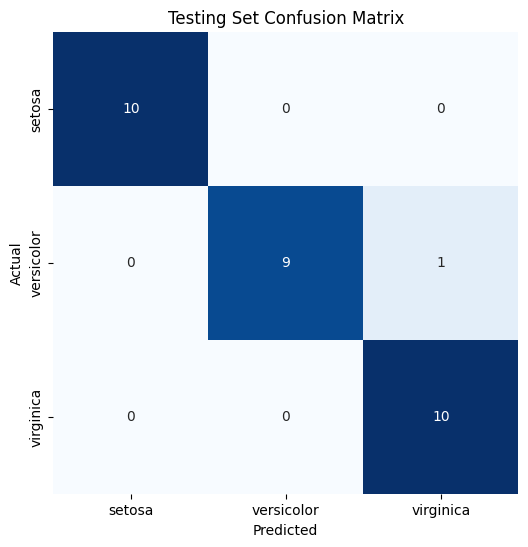


Classification Report (Testing Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
# Your code here :

# Generate confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Define confusion matrix plotter function
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot training set confusion matrix
plot_confusion_matrix(train_cm, "Training Set Confusion Matrix")

# Plot testing set confusion matrix
plot_confusion_matrix(test_cm, "Testing Set Confusion Matrix")

# Print classification report for the testing set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !